In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import zipfile
from tqdm import tqdm
from glob import glob
from shutil import copy, move

## Data Preparation

In [2]:
zipfile_dir = '../input/dogs-vs-cats/train.zip'
train_dir = zipfile.ZipFile(zipfile_dir, 'r')
train_dir.extractall()

zipfile_dir = '../input/dogs-vs-cats/test1.zip'
test_dir = zipfile.ZipFile(zipfile_dir, 'r')
test_dir.extractall()

In [3]:
TRAIN_DIR = './train'
TEST_DIR = './test1'

train_set = os.listdir(TRAIN_DIR)
test_set = os.listdir(TEST_DIR)

print('#train images: %s'%len(train_set))
print('#test images: %s'%len(test_set))
print(train_set[:5])
print(test_set[:5])

#train images: 25000
#test images: 12500
['dog.8647.jpg', 'cat.2669.jpg', 'cat.11125.jpg', 'cat.810.jpg', 'cat.10487.jpg']
['4094.jpg', '9639.jpg', '10879.jpg', '8600.jpg', '174.jpg']


In [5]:
dog_train_dir = './training/dog'
dog_val_dir = './validation/dog'
cat_train_dir = './training/cat'
cat_val_dir = './validation/cat'

file_dirs = [dog_train_dir, dog_val_dir, cat_train_dir, cat_val_dir]

for dir in file_dirs:
    os.makedirs(dir,exist_ok = True)

In [6]:
all_dogs = glob('./train/dog*jpg')
all_cats = glob('./train/cat*jpg')

print(len(all_dogs))
print(len(all_cats))

12500
12500


In [7]:
from sklearn.model_selection import train_test_split

dogs_train, dogs_test = train_test_split(all_dogs, test_size=0.1, shuffle=True,random_state = 100)
cats_train, cats_test = train_test_split(all_cats, test_size=0.1, shuffle=True,random_state = 100)

In [8]:
for name in tqdm(dogs_train):
  copy(name , os.path.join(dog_train_dir , name.split('/')[-1]))
for name in tqdm(cats_train):
  copy(name , os.path.join(cat_train_dir , name.split('/')[-1]))
  
for name in tqdm(dogs_test):
  copy(name , os.path.join(dog_val_dir , name.split('/')[-1]))
for name in tqdm(cats_test):
  copy(name , os.path.join(cat_val_dir , name.split('/')[-1]))

100%|██████████| 1250/1250 [00:00<00:00, 9286.88it/s]


In [9]:
print(len(os.listdir(dog_train_dir)))
print(len(os.listdir(cat_train_dir)))
print(len(os.listdir(dog_val_dir)))
print(len(os.listdir(cat_val_dir)))

11250
11250
1250
1250


## Data Preprocessing

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = './training'
train_datagen = ImageDataGenerator(rescale=1 / 255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='binary',
    target_size=(150, 150)
)

VALIDATION_DIR = './validation'
validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## Model Creation

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal',input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 128)      

In [14]:
check_point_path = './best.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath = check_point_path,
    monitor = 'val_accuracy',
    save_weights_only=False,
    save_best_only=True,
    verbose=1
)

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.0005,decay=1e-5),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [18]:
print('Num Params : ',model.count_params())
model_history = model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    callbacks = [model_checkpoint],
    validation_data=validation_generator
)

Num Params :  52351425
Epoch 1/20
352/352 [==============================] - 92s 262ms/step - loss: 0.4321 - acc: 0.7968 - val_loss: 0.4375 - val_acc: 0.7884
Epoch 2/20
352/352 [==============================] - 92s 261ms/step - loss: 0.3815 - acc: 0.8288 - val_loss: 0.3616 - val_acc: 0.8404
Epoch 3/20
352/352 [==============================] - 93s 263ms/step - loss: 0.3377 - acc: 0.8504 - val_loss: 0.3174 - val_acc: 0.8660
Epoch 4/20
352/352 [==============================] - 92s 261ms/step - loss: 0.3057 - acc: 0.8702 - val_loss: 0.3481 - val_acc: 0.8440
Epoch 5/20
352/352 [==============================] - 92s 261ms/step - loss: 0.2855 - acc: 0.8784 - val_loss: 0.2836 - val_acc: 0.8716
Epoch 6/20
352/352 [==============================] - 93s 262ms/step - loss: 0.2591 - acc: 0.8892 - val_loss: 0.2882 - val_acc: 0.8736
Epoch 7/20
352/352 [==============================] - 92s 260ms/step - loss: 0.2500 - acc: 0.8922 - val_loss: 0.2375 - val_acc: 0.8968
Epoch 8/20
352/352 [============

## Model Evaluation

Plotting Loss and Accuracy

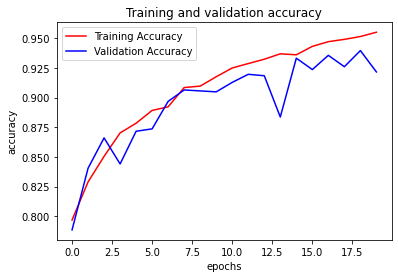

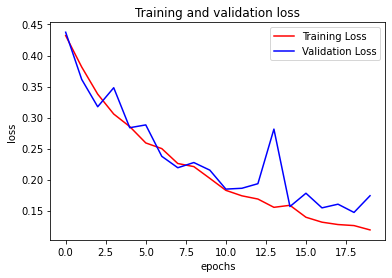

In [19]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=model_history.history['acc']
val_acc=model_history.history['val_acc']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

# Desired output. Charts with training and validation metrics. 

In [20]:
test_file = os.listdir("./test1")
test_df = pd.DataFrame({
    'filename': test_file
})
test_df

,filename
0,4094.jpg
1,9639.jpg
2,10879.jpg
3,8600.jpg
4,174.jpg
...,...
12495,4948.jpg
12496,8630.jpg
12497,7420.jpg
12498,1830.jpg


In [21]:
TESTING_DIR = './test1'
test_generator = train_datagen.flow_from_dataframe(
    test_df,
    directory = TESTING_DIR,
    x_col='filename',
    y_col=None,
    batch_size=64,
    target_size=(150, 150),
    shuffle = False,
    class_mode = None
)

Found 12500 validated image filenames.


In [22]:
test_generator.reset()
y_pred = model.predict(test_generator)

To see the class mapping of dogs and cats, we have to see class_indices from training dataset

In [23]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

Let's make labels

In [24]:
y_pred_classification = np.where(y_pred > 0.5, 1, 0)
y_pred_classification

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

Seeing some results

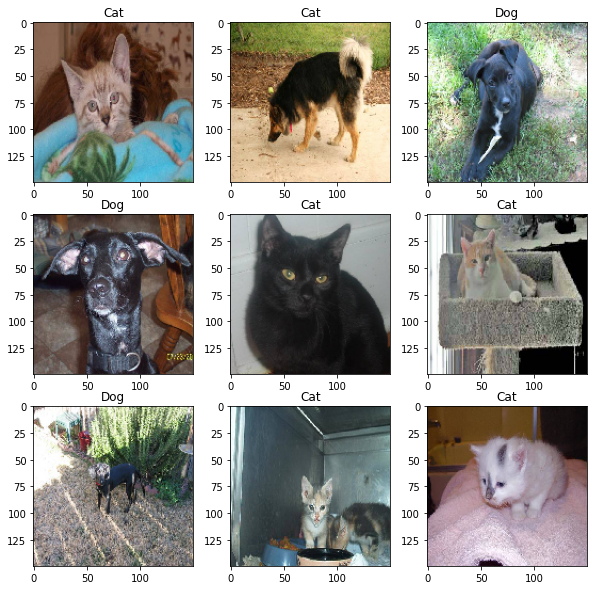

In [25]:
test_generator.reset()
test_images = test_generator[0][:9]

fig, ax = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i, img in enumerate(test_images):
    ax[i//3][i%3].imshow(img)
    if y_pred_classification[i]==1:
        label = 'Dog'
    else:
        label = 'Cat'
    ax[i//3][i%3].set_title(label)

Visualizing first 9 filters

In [26]:
model.layers

(150, 150, 64)


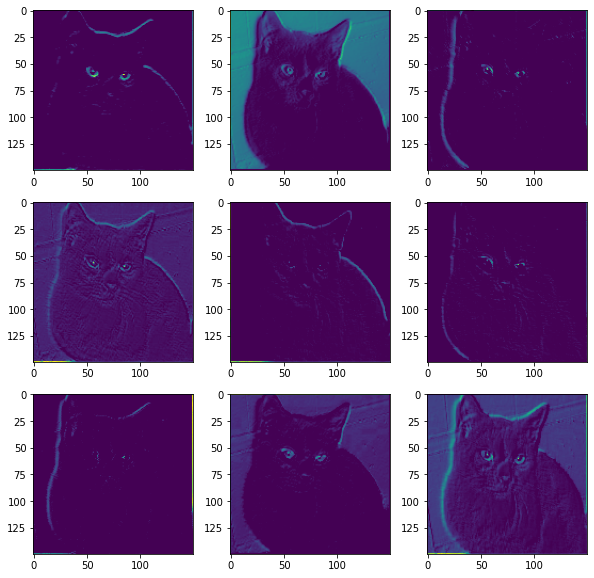

In [27]:
first_conv = model.layers[0]
output_layer1 = first_conv(test_images)[4]

print(output_layer1.shape)
fig, ax = plt.subplots(3,3)
fig.set_size_inches(10,10)
for i in range(9):
  ax[i//3][i%3].imshow(output_layer1[:,:,i])

## Submition